# EC7212 – Computer Vision and Image Processing

## Take Home Assignment 1

## EG/2020/4225 - Suraweera S.A.Y.A.

#### [GitHub Repository](https://github.com/YasinduAmantha/Computer_Vision_Assignment_1_4225.git)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## Task 1: Reducing Image Intencity

In [2]:
def reduce_intensity_levels(image, levels):
    if not (levels & (levels - 1) == 0 and levels <= 256):
        raise ValueError("Levels must be a power of 2 and ≤ 256")

    # Compute the quantization step
    step = 256 // levels
    reduced_img = (image // step) * step

    return reduced_img

In [3]:
img_path = os.path.join("..", "image", "car1.jpg")
original_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if original_img is None:
    raise FileNotFoundError(f"Image file not found at {img_path}")

In [4]:
levels = 8
reduced_img = reduce_intensity_levels(original_img, levels)

In [5]:
output_path = os.path.join("..", "results", "intensity_reduced_img.jpg")
cv2.imwrite(output_path, reduced_img)

True

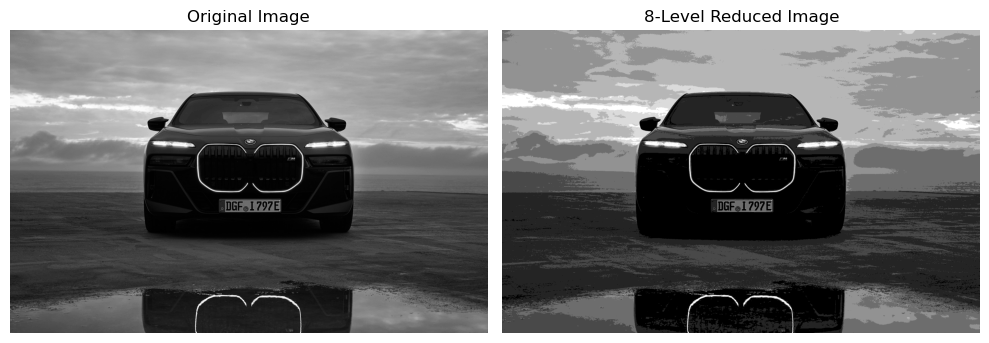

In [6]:
# Plot using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reduced_img, cmap='gray')
plt.title(f'{levels}-Level Reduced Image')
plt.axis('off')

plt.tight_layout()
plt.show()

## Task 2: Spatial Average

In [7]:
def average_filter(img, mask):
    return cv2.blur(img, (mask, mask))

In [8]:
convoluted_img_3 = average_filter(original_img, 3)
convoluted_img_10 = average_filter(original_img, 10)
convoluted_img_20 = average_filter(original_img, 20)

images = [original_img, convoluted_img_3, convoluted_img_10, convoluted_img_20]
topics = ['Original Image', '3x3 Averaged Image', '10x10 Averaged Image', '20x20 Averaged Image']

In [9]:
for i in range(1, 4):
    output_path = os.path.join("..", "results", f"{topics[i]}.jpg")
    cv2.imwrite(output_path, images[i])

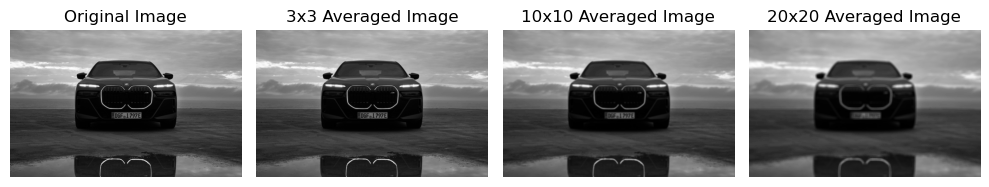

In [10]:
# Plot using matplotlib
plt.figure(figsize=(10, 5))

for i in range(0, 4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(topics[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

## Task 3: Image Rotation

#### Rotate by 45 degrees

In [11]:
# Shape of image in terms of pixels.
(rows, cols) = original_img.shape[:2]

M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
angled_img = cv2.warpAffine(original_img, M, (cols, rows))

In [12]:
output_path = os.path.join("..", "results", "45_rotated_img.jpg")
cv2.imwrite(output_path, angled_img)

True

#### Rotate by 90 degrees

In [13]:
rotated_img = cv2.rotate(original_img, cv2.ROTATE_90_CLOCKWISE)
output_path = os.path.join("..", "results", "90_rotated_img.jpg")
cv2.imwrite(output_path, rotated_img)

True

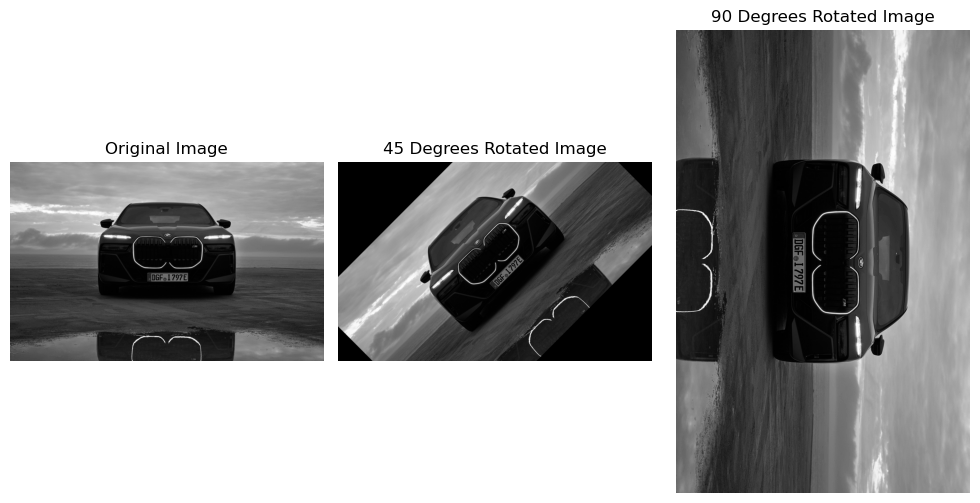

In [14]:
# Plot using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(original_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(angled_img, cmap='gray')
plt.title(f'45 Degrees Rotated Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(rotated_img, cmap='gray')
plt.title(f'90 Degrees Rotated Image')
plt.axis('off')

plt.tight_layout()
plt.show()

## Task 4: Spatial Resolution Reduction

In [15]:
def block_average(img, k):
    h, w = img.shape[:2]
    out = img.copy()

    for i in range(0, h-k+1, k):
        for j in range(0, w-k+1, k):
            block = img[i:i+k, j:j+k]

            mean = block.mean(axis=(0, 1), dtype=np.uint8)

            out[i:i+k, j:j+k] = mean

    return out

In [16]:
img_3 = block_average(original_img, 3)
img_5 = block_average(original_img, 5)
img_7 = block_average(original_img, 7)

In [17]:
titles = ['Original', '3x3 Block Averaged', '5x5 Block Averaged', '7x7 Block Averaged']
blocked_images = [original_img, img_3, img_5, img_7]

In [18]:
for i in range(1, 4):
    output_path = os.path.join("..", "results", f"{titles[i]}.jpg")
    cv2.imwrite(output_path, images[i])

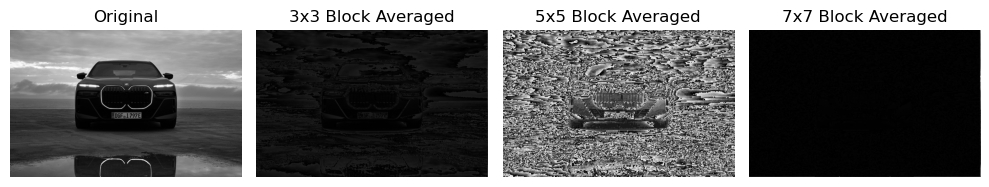

In [19]:
# Plot using matplotlib
plt.figure(figsize=(10, 5))

for i in range(0, 4):
    plt.subplot(1, 4, i+1)
    plt.imshow(blocked_images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()